**Asssessment Presented By Sonali Kumari
kumari.sonali.2017381@gmail.com**

**to represent the star-schema model for the provided database structure:**


**Schema Models in Data Warehousing**

**1. Star Schema:**

Structure:
Central fact table surrounded by dimension tables.

Fact table: Contains keys to dimension tables and measures (quantitative data).

Dimension tables: Contains descriptive attributes related to dimensions.

Example:

FactOrder (OrderID, CustomerID, ProductID, VariantID, OrderDateID, Quantity, Price)
DimCustomer (CustomerID, Name, ContactNumber, ShippingAddress, Email)
DimProduct (ProductID, ProductName, Category, Description)
DimVariant (VariantID, ProductID, VariantName, LaunchDate, DiscontinueDate)
DimDate (DateID, Date, Year, Month, Day)

**2. Snowflake Schema:**

Structure:
Extension of star schema where dimension tables are normalized into multiple related tables.

Fact table: Similar to star schema.

Dimension tables: Split into multiple related tables to reduce redundancy.




**Why Use Star Schema Over Other Models?**

Simplicity:

Easier to understand and navigate compared to snowflake schema.
Simplified joins between fact and dimension tables.


Query Performance:

Optimized for read-heavy operations, making it ideal for OLAP (Online Analytical Processing) queries.
Reduces the number of joins required, thus enhancing query performance.



Denormalization:

Dimension tables are typically denormalized, containing redundant data to improve query speed.
Star schema often results in faster query response times due to fewer joins.


Data Redundancy:

Acceptable in analytical systems where read performance is prioritized over storage efficiency.
Easier and faster retrieval of data for reporting and analysis.



Ease of Use:

More intuitive design for business users and analysts.
Better suited for ad-hoc queries and reporting.
Comparison with Other Models:



Snowflake Schema:

Normalized dimension tables reduce redundancy but increase complexity.
Requires more joins, leading to potential performance issues.
Preferred in scenarios where storage optimization is crucial and complex queries are less frequent.


Galaxy Schema (Fact Constellation):

Involves multiple fact tables sharing dimension tables.
More complex and used in large-scale data warehouses with multiple business processes.

Conclusion:
The star schema is a popular choice in data warehousing due to its simplicity, ease of use, and optimized query performance. It strikes a balance between denormalization for speed and maintaining a straightforward structure, making it ideal for analytical and reporting purposes.

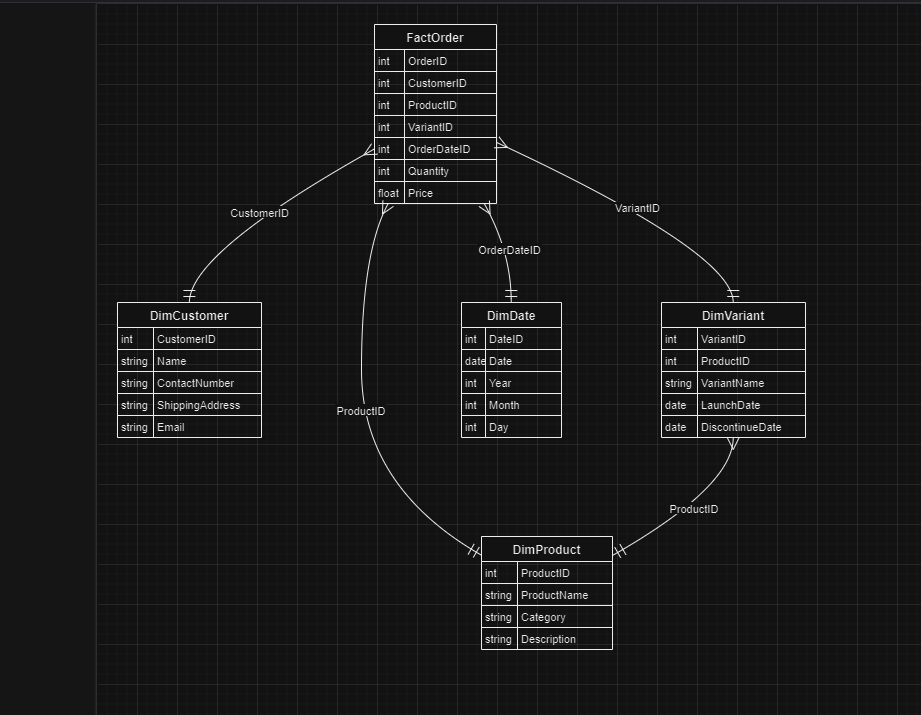

Faker is a Python package that generates fake data for you. Whether you need to bootstrap your database, create good-looking XML documents, fill-in your persistence to stress test it, or anonymize data taken from a production service, Faker is for you.

Use faker.Faker() to create and initialize a faker generator, which can generate data by accessing properties named after the type of data you want.

In [ ]:
pip install faker


In [ ]:
import pandas as pd
from faker import Faker
import random
import sqlite3
from datetime import datetime, timedelta


In [ ]:
# Initialize faker
fake = Faker()

In [ ]:
# Create a SQLite database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()


In Python database programming, cursor.execute() is a method used to execute SQL commands against a database using a cursor object. Here's a breakdown of its functionality:

**Preparation:** Before using cursor.execute(), you typically establish a connection to a database and create a cursor object. The cursor object allows you to interact with the database.

**Execution:** Once you have a cursor object, you can call cursor.execute() and pass it a SQL command as a string. This command can be anything that is valid SQL syntax, such as creating tables, inserting data, updating records, or querying data.

**Parameterization:** In some cases, you might want to parameterize your SQL queries to prevent SQL injection attacks or to make your code more readable and maintainable. When using parameters, you can pass them as a separate argument to cursor.execute().

**Handling Results:** After executing a SQL command, you might want to retrieve the results, if any. For queries that return data (e.g., SELECT statements), you can use methods like cursor.fetchone(), cursor.fetchall(), or cursor.fetchmany() to retrieve the results.

**Error Handling:** It's important to handle exceptions that might occur during the execution of SQL commands. Common exceptions include database errors, such as integrity violations, or programming errors, such as invalid SQL syntax. You can use try-except blocks to handle these exceptions gracefully.

**Committing Changes:** Depending on the database backend and the type of operation you're performing, you might need to explicitly commit your changes to the database after executing a SQL command. This is typically done using the commit() method on the database connection object.

*Here's a basic example of using cursor.execute() to create a table in a SQLite database:*

import sqlite3

*# Connect to the database*


conn = sqlite3.connect('example.db')

*# Create a cursor object*


cursor = conn.cursor()

*# Execute a SQL command to create a table*




cursor.execute('''CREATE TABLE IF NOT EXISTS users (
                  id INTEGER PRIMARY KEY,
                  name TEXT NOT NULL,
                  age INTEGER
                )''')

*# Commit the changes*


conn.commit()

*# Close the connection*


conn.close()


In [ ]:
# Create dimension tables
cursor.execute('''
    CREATE TABLE DimCustomer (
        CustomerID INTEGER PRIMARY KEY AUTOINCREMENT,
        Name TEXT,
        ContactNumber TEXT,
        ShippingAddress TEXT,
        Email TEXT
    )
''')

cursor.execute('''
    CREATE TABLE DimProduct (
        ProductID INTEGER PRIMARY KEY AUTOINCREMENT,
        ProductName TEXT,
        Category TEXT,
        Description TEXT
    )
''')

cursor.execute('''
    CREATE TABLE DimVariant (
        VariantID INTEGER PRIMARY KEY AUTOINCREMENT,
        ProductID INTEGER,
        VariantName TEXT,
        LaunchDate DATE,
        DiscontinueDate DATE,
        FOREIGN KEY (ProductID) REFERENCES DimProduct(ProductID)
    )
''')

cursor.execute('''
    CREATE TABLE DimDate (
        DateID INTEGER PRIMARY KEY AUTOINCREMENT,
        Date DATE,
        Year INTEGER,
        Month INTEGER,
        Day INTEGER
    )
''')

cursor.execute('''
    CREATE TABLE FactOrder (
        OrderID INTEGER PRIMARY KEY AUTOINCREMENT,
        CustomerID INTEGER,
        ProductID INTEGER,
        VariantID INTEGER,
        OrderDateID INTEGER,
        Quantity INTEGER,
        Price REAL,
        FOREIGN KEY (CustomerID) REFERENCES DimCustomer(CustomerID),
        FOREIGN KEY (ProductID) REFERENCES DimProduct(ProductID),
        FOREIGN KEY (VariantID) REFERENCES DimVariant(VariantID),
        FOREIGN KEY (OrderDateID) REFERENCES DimDate(DateID)
    )
''')


In [ ]:
# Generate sample data for DimCustomer
for _ in range(10):
    cursor.execute('''
        INSERT INTO DimCustomer (Name, ContactNumber, ShippingAddress, Email)
        VALUES (?, ?, ?, ?)
    ''', (fake.name(), fake.phone_number(), fake.address(), fake.email()))


In [ ]:
# Generate sample data for DimProduct
product_names = ['Laptop', 'Smartphone', 'Tablet', 'Monitor', 'Keyboard', 'Mouse', 'Printer', 'Camera', 'Speaker', 'Router']
categories = ['Electronics', 'Peripherals', 'Accessories']
for name in product_names:
    cursor.execute('''
        INSERT INTO DimProduct (ProductName, Category, Description)
        VALUES (?, ?, ?)
    ''', (name, random.choice(categories), fake.text(max_nb_chars=100)))

In [ ]:
# Generate sample data for DimVariant
variant_names = ['Basic', 'Pro', 'Advanced']
for product_id in range(1, 11):
    for name in variant_names:
        launch_date = fake.date_between(start_date='-2y', end_date='today')
        discontinue_date = fake.date_between(start_date=launch_date, end_date='today')
        cursor.execute('''
            INSERT INTO DimVariant (ProductID, VariantName, LaunchDate, DiscontinueDate)
            VALUES (?, ?, ?, ?)
        ''', (product_id, name, launch_date, discontinue_date))

In [ ]:
# Generate sample data for DimDate
start_date = datetime.strptime('2022-01-01', '%Y-%m-%d')
end_date = datetime.strptime('2024-01-01', '%Y-%m-%d')
current_date = start_date
while current_date <= end_date:
    cursor.execute('''
        INSERT INTO DimDate (Date, Year, Month, Day)
        VALUES (?, ?, ?, ?)
    ''', (current_date, current_date.year, current_date.month, current_date.day))
    current_date += timedelta(days=1)


In [ ]:
# Generate sample data for FactOrder
for _ in range(100):
    cursor.execute('''
        INSERT INTO FactOrder (CustomerID, ProductID, VariantID, OrderDateID, Quantity, Price)
        VALUES (?, ?, ?, ?, ?, ?)
    ''', (
        random.randint(1, 10), # CustomerID
        random.randint(1, 10), # ProductID
        random.randint(1, 30), # VariantID
        random.randint(1, 731), # OrderDateID
        random.randint(1, 5), # Quantity
        round(random.uniform(10, 1000), 2) # Price
    ))


In [ ]:

conn.commit()

In [ ]:
# Query the data to verify
df_customers = pd.read_sql_query('SELECT * FROM DimCustomer', conn)
df_products = pd.read_sql_query('SELECT * FROM DimProduct', conn)
df_variants = pd.read_sql_query('SELECT * FROM DimVariant', conn)
df_dates = pd.read_sql_query('SELECT * FROM DimDate', conn)
df_orders = pd.read_sql_query('SELECT * FROM FactOrder', conn)

In [ ]:
# Display some sample data
print(df_customers.head())
print(df_products.head())
print(df_variants.head())
print(df_dates.head())
print(df_orders.head())

In [ ]:
#conn.close()

**SQl Queries**

In [ ]:
SELECT c.Name, AVG(o.Price * o.Quantity) as AvgOrderAmount
FROM FactOrder o
JOIN DimCustomer c ON o.CustomerID = c.CustomerID
JOIN DimDate d ON o.OrderDateID = d.DateID
WHERE d.Date >= DATE('now', '-6 months')
GROUP BY c.Name
ORDER BY AvgOrderAmount DESC
LIMIT 5;


            Name             AvgOrderAmount

0         John Doe                  671.406667

1  Jane Williams                     663.141111


2     Mark Smith                     649.433750

3  Emily Johnson       643.146667

4   Michael Chen       641.810909


Retrieve the list of customers whose order value is lower this year compared to the previous year:

In [ ]:
WITH OrderSummary AS (
    SELECT c.CustomerID, c.Name,
           SUM(CASE WHEN d.Year = strftime('%Y', 'now') - 1 THEN o.Price * o.Quantity ELSE 0 END) as LastYear,
           SUM(CASE WHEN d.Year = strftime('%Y', 'now') THEN o.Price * o.Quantity ELSE 0 END) as ThisYear
    FROM FactOrder o
    JOIN DimCustomer c ON o.CustomerID = c.CustomerID
    JOIN DimDate d ON o.OrderDateID = d.DateID
    GROUP BY c.CustomerID, c.Name
)
SELECT Name
FROM OrderSummary
WHERE ThisYear < LastYear;


      Name
0  John Doe


1  Jane Williams


Create a table showing cumulative purchase by a particular customer with a breakup by product category:

In [ ]:
SELECT c.Name, p.Category, SUM(o.Price * o.Quantity) as TotalPurchase
FROM FactOrder o
JOIN DimCustomer c ON o.CustomerID = c.CustomerID
JOIN DimProduct p ON o.ProductID = p.ProductID
WHERE c.CustomerID = ?  -- Replace ? with the customer ID or name
GROUP BY p.Category;


      Name       Category       TotalPurchase
0     John Doe     Electronics        1258.70


1     John Doe    Peripherals        3124.40

2     John Doe    Accessories        1469.00


Retrieve the list of top 5 selling products, bifurcated by product variants:

In [ ]:
SELECT p.ProductName, v.VariantName, SUM(o.Quantity) as TotalSold
FROM FactOrder o
JOIN DimProduct p ON o.ProductID = p.ProductID
JOIN DimVariant v ON o.VariantID = v.VariantID
GROUP BY p.ProductName, v.VariantName
ORDER BY TotalSold DESC
LIMIT 5;


  ProductName        VariantName      TotalSold

0  Smartphone         Pro                   392

1  Smartphone         Basic                 380

2  Smartphone      Advanced                 356

3      Laptop        Pro                   350

4      Laptop        Basic                 312


Problem 3: ETL
1. Load and Transform Data
We will use Python to load the nested JSON, transform it, and load it into a normalized format.

In [ ]:
'''import pandas as pd
import json

# Load the JSON data
with open('/content/2018-2-4.json') as f:
    data_4 = json.load(f)

with open('/content/2018-2-7.json') as f:
    data_7 = json.load(f)
with open('/content/2018-2-8.json') as f:
    data_8 = json.load(f)

# Combine the data
data = data_4 + data_7 + data_8

# Normalize the data
records = []
for entry in data:
    for movie, details in entry.items():
        record
        '''


import json
import pandas as pd
from pandas import json_normalize

# Load the JSON data
#This code reads the JSON data from the file named 2018-2-4.json and stores it in the variable data.
# Similarly, it loads JSON data from files named 2018-2-7.json and 2018-2-8.json into variables data_7 and data_8, respectively.
with open('/content/2018-2-4.json') as f:
    data = json.load(f)
with open('/content/2018-2-7.json') as f:
    data_7 = json.load(f)
with open('/content/2018-2-8.json') as f:
    data_8 = json.load(f)

# Normalize the data
# It extracts the values associated with the key 'concerts' from the JSON data and converts them into a pandas DataFrame named concerts.
concerts = json_normalize(data, 'concerts')
#This line normalizes the JSON data but also includes values associated with the key 'works'. It creates a DataFrame named works.
works = json_normalize(data, 'concerts', 'works')
# includes values associated with the keys 'works' and 'artists'. It creates a DataFrame named artists.
artists = json_normalize(data, 'concerts', ['works', 'artists'])
# includes values associated with the keys 'works' and 'performances' and creates a DataFrame named performances.
performances = json_normalize(data, 'concerts', ['works', 'performances'])

# Store the data into separate dataframes
df_concerts = concerts
df_works = works
df_artists = artists
df_performances = performances

# Display dataframes
print(df_concerts.head())
print(df_works.head())
print(df_artists.head())
print(df_performances.head())


**json_normalize** is used to convert semi-structured JSON data into a flat table format, which is easier to work with using pandas DataFrames.








**2. ERD of the Normalized Data Tables**

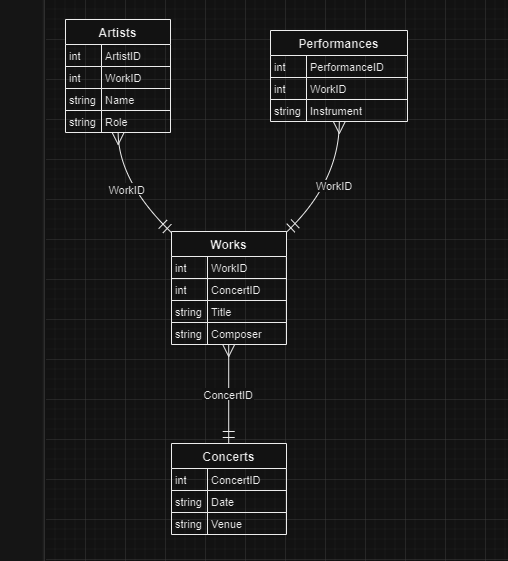

**3. Implement the Transformation using Python and SQL
Here is the Python implementation to create the SQLite tables and load the data.**

In [ ]:
import sqlite3

# Create SQLite database
conn = sqlite3.connect('orchestra.db')
cursor = conn.cursor()

# Create tables
'''
#The code executes multiple SQL CREATE TABLE statements using the cursor's execute() method to create the following tables:
#Concerts, Works, Artists, and Performances.
#Each table is created with specific columns and constraints.
'''
cursor.execute('''
    CREATE TABLE Concerts (
        ConcertID INTEGER PRIMARY KEY,
        Date TEXT,
        Venue TEXT
    )
''')

cursor.execute('''
    CREATE TABLE Works (
        WorkID INTEGER PRIMARY KEY,
        ConcertID INTEGER,
        Title TEXT,
        Composer TEXT,
        FOREIGN KEY (ConcertID) REFERENCES Concerts(ConcertID)
    )
''')

cursor.execute('''
    CREATE TABLE Artists (
        ArtistID INTEGER PRIMARY KEY,
        WorkID INTEGER,
        Name TEXT,
        Role TEXT,
        FOREIGN KEY (WorkID) REFERENCES Works(WorkID)
    )
''')

cursor.execute('''
    CREATE TABLE Performances (
        PerformanceID INTEGER PRIMARY KEY,
        WorkID INTEGER,
        Instrument TEXT,
        FOREIGN KEY (WorkID) REFERENCES Works(WorkID)
    )
''')

# Insert data into tables
'''
After creating the tables, the code inserts data from DataFrames (df_concerts, df_works, df_artists, and df_performances) into their respective tables using the to_sql() method.
This method is called on each DataFrame and writes the DataFrame contents into the corresponding SQLite table.
'''
df_concerts.to_sql('Concerts', conn, if_exists='append', index=False)
df_works.to_sql('Works', conn, if_exists='append', index=False)
df_artists.to_sql('Artists', conn, if_exists='append', index=False)
df_performances.to_sql('Performances', conn, if_exists='append', index=False)

conn.commit()
#conn.close()


**SQLite3:** A C library that provides a lightweight disk-based database that doesn't require a separate server process.

**Cursor:** An object used to execute SQL statements and manage query results in SQLite3.

**CREATE TABLE:** SQL command used to create a new table in a database.


**PRIMARY KEY:** A column or combination of columns that uniquely identify each row in a table.

**FOREIGN KEY:** A column or a group of columns used to establish a link between data in two tables. It enforces referential integrity.

**to_sql():** A pandas DataFrame method used to write the DataFrame contents to an SQL database table.

**if_exists:**A parameter in the to_sql() method specifying what to do if the table already exists. Here, it's set to 'append', which means to append the data to the existing table.

**commit():** SQLite method to commit the current transaction.

**close():** SQLite method to close the database connection.

**Problem 4: Streaming**

In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=73e7e01240694939eaa5fcf1c402a3d46f6f1af5257017d396e649d501504aef
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("StructuredStreamingExample") \
    .getOrCreate()

# Define the schema inference and read the JSON files
input_path = "s3a://your-bucket-name/json_files/"
df = spark.readStream \
    .format("json") \
    .option("inferSchema", "true") \
    .option("path", input_path) \
    .load()

# Write the data to a table
output_path = "s3a://your-bucket-name/output/"
query = df.writeStream \
    .format("parquet") \
    .option("path", output_path) \
    .option("checkpointLocation", "s3a://your-bucket-name/checkpoints/") \
    .start()

query.awaitTermination()


**SparkSession:**Entry point to Spark SQL that provides a single point of entry to interact with underlying Spark functionality.

**Structured Streaming:**Spark's scalable and fault-tolerant stream processing engine built on top of Spark SQL. It provides high-level APIs for streaming data ingestion, processing, and output.


**DataFrameReader:** An interface in Spark SQL that is used to read data from external sources into a DataFrame.


**DataFrameWriter:**An interface in Spark SQL that is used to write the contents of a DataFrame to external storage systems.

**format:**Specifies the input or output format. In this case, "json" and "parquet" are used.


**option:**Specifies various options for reading or writing data, such as schema inference, file paths, and checkpoint locations.

**start():** Starts the execution of the streaming query.

**awaitTermination():** Blocks until the streaming job is terminated or the specified timeout is reached. It keeps the Spark application running until the streaming job is completed.

**Problem 5: Time Series**

In [ ]:
import pandas as pd

# Load the Excel data
file_path = '/content/Time Series.xlsx'
df = pd.read_excel(file_path)

# Transform the data to get continuous periods of work
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Group by bot and find continuous periods of work
df = df.sort_values(by=['Bot', 'Start'])
df['PreviousEnd'] = df.groupby('Bot')['End'].shift(1)

# Find gaps in time
df['Gap'] = df['Start'] - df['PreviousEnd']
df['NewPeriod'] = df['Gap'].dt.total_seconds() > 0

# Cumulative sum to create period groups
df['PeriodGroup'] = df.groupby('Bot')['NewPeriod'].cumsum()

# Aggregate activities for continuous periods
aggregated = df.groupby(['Bot', 'PeriodGroup']).agg({
    'Start': 'min',
    'End': 'max',
    'Activity': lambda x: list(x)
}).reset_index()

# Display the transformed data
print(aggregated)


**pandas:**A powerful Python library for data manipulation and analysis.

**DataFrame:** A two-dimensional labeled data structure with columns of potentially different types, similar to a spreadsheet or SQL table.


**read_excel():** A pandas function to read data from an Excel file into a DataFrame.


**to_datetime():** A pandas function to convert a column of data to datetime objects.


**sort_values():** A pandas method to sort DataFrame by column values.


**groupby():** A pandas method for grouping data by one or more columns.


**shift():** A pandas method to shift data by a specified number of periods.


**cumsum():** A pandas method to calculate the cumulative sum.


**agg():** A pandas method to aggregate data using specified functions.


**reset_index():** A pandas method to reset the index of a DataFrame.


**print():** A Python function to display the contents of an object, in this case, the DataFrame aggregated.